### **Recomendation system MODISTA - Provides outfits according to your fashion**
Dataset:
https://www.kaggle.com/datasets/ishanshrivastava28/sales-transaction-dataset-with-product-details

In [ ]:
!pip install gdown==5.1.0      # mengunduh file dari Google Drive menggunakan tautan yang dapat dibagikan.
!pip install -q keras-nlp --upgrade
!pip install keras-core --upgrade

In [ ]:
!pip install tensorflow numpy matplotlib seaborn pandas
!pip install tflite-runtime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.lite as tflite
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, models
from pandas import DataFrame, Series

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
url = 'https://drive.google.com/file/d/1gaiuUwDTOl8pjxHAUYF7kr_nTfgydkw6/view?usp=drive_link'

# Mengambil ID file dari tautan
file_id = url.split('/')[-2]

# Membuat tautan langsung ke file CSV
download_url = 'https://drive.google.com/uc?id=' + file_id

# Membaca file CSV dari tautan
df = pd.read_csv(download_url)

# Menampilkan DataFrame
df

,Date,Customer_ID,Product_ID,Quantity,Unit_Price,Sales_Revenue,Product_Description,Product_Category,Product_Line,Raw_Material,Region,Latitude,Longitude
0,20210601,98,321,1,117.306016,117.306016,Cycling Jerseys,Sports,Tops,Fabrics,York,53.958332,-1.080278
1,20210602,92,261,4,32.272403,129.089613,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
2,20210603,92,264,1,36.193364,36.193364,Casual Shirts,Menswear,Tops,Cotton,Worcester,52.192001,-2.220000
3,20210604,99,251,3,29.913403,89.740210,Jeans,Menswear,Trousers,Cotton,Winchester,51.063202,-1.308000
4,20210605,66,251,1,41.843430,41.843430,Shorts,Womenswear,Trousers,Cotton,Winchester,51.063202,-1.308000
5,20210606,97,304,3,49.887524,149.662573,Belts,Accessories,Leathers,Leather,Wells,51.209000,-2.647000
6,20210607,45,357,2,35.416016,70.832032,Ties,Accessories,Tops,Leather,Wakefield,53.680000,-1.490000
7,20210608,81,258,1,29.084205,29.084205,Polo Shirts,Menswear,Tops,Cotton,Wakefield,53.680000,-1.490000
8,20210609,47,260,3,44.498077,133.494232,Tshirts,Womenswear,Tops,Cotton,Wakefield,53.680000,-1.490000
9,20210610,24,263,3,38.497397,115.492191,Formal Shirts,Womenswear,Tops,Wool,Winchester,51.063202,-1.308000


### **Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 30 non-null     int64  
 1   Customer_ID          30 non-null     int64  
 2   Product_ID           30 non-null     int64  
 3   Quantity             30 non-null     int64  
 4   Unit_Price           30 non-null     float64
 5   Sales_Revenue        30 non-null     float64
 6   Product_Description  30 non-null     object 
 7   Product_Category     30 non-null     object 
 8   Product_Line         30 non-null     object 
 9   Raw_Material         30 non-null     object 
 10  Region               30 non-null     object 
 11  Latitude             30 non-null     float64
 12  Longitude            30 non-null     float64
dtypes: float64(4), int64(4), object(5)
memory usage: 3.2+ KB


In [ ]:
# Misalkan df adalah DataFrame kita
missing_values = df.isnull().sum()
print(missing_values)

Date                   0
Customer_ID            0
Product_ID             0
Quantity               0
Unit_Price             0
Sales_Revenue          0
Product_Description    0
Product_Category       0
Product_Line           0
Raw_Material           0
Region                 0
Latitude               0
Longitude              0
dtype: int64


In [ ]:
#Verifying added columns in data frame
df.columns

Index(['Date', 'Customer_ID', 'Product_ID', 'Quantity', 'Unit_Price',
       'Sales_Revenue', 'Product_Description', 'Product_Category',
       'Product_Line', 'Raw_Material', 'Region', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
features=['Product_ID', 'Product_Category','Product_Description','Unit_Price']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vektorisasi deskripsi produk
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Product_Description'])

# Konversi kategori produk menjadi representasi numerik
df['Product_Category'] = df['Product_Category'].astype('category')
df['Product_Category_Code'] = df['Product_Category'].cat.codes

# Gabungkan fitur-fitur menjadi satu array
features = np.hstack([df[['Unit_Price', 'Product_Category_Code']].values, tfidf_matrix.toarray()])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Kombinasi fitur teks dan numerik
def preprocess_data(df1):
    tfidf = TfidfVectorizer(stop_words='english', max_features=500)
    tfidf_matrix = tfidf.fit_transform(df1['Product_Description'])

    # Menggabungkan fitur teks TF-IDF dengan fitur kategori dan harga
    category_dummies = pd.get_dummies(df1['Product_Category'])
    price = df1[['Unit_Price']]
    data_combined = pd.concat([pd.DataFrame(tfidf_matrix.toarray()), category_dummies, price], axis=1)

    # Mengubah semua nama kolom menjadi string
    data_combined.columns = data_combined.columns.astype(str)

    return data_combined

data_features = preprocess_data(df)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
# Similarity antar item
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
# Standarisasi fitur-fitur
scaler = StandardScaler()
data_features_scaled = scaler.fit_transform(data_features)

In [ ]:
# Tentukan jumlah cluster
num_clusters = 3

# Terapkan K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(data_features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **Recomendation System**

sistem rekomendasi ini memiliki beberapa fitur:
1. Demographic filtering
- berdasarkan harga (paling murah ke mahal)
- berdasarkan bahan (material)
- berdasarkan daerah (Region) -> setiap region beda beda style
2. Content Based Filtering ()
3. Hybrid Rekomendation (setelah ada yang beli atau setidaknya melihat lihat, akan diberikan rekomendasi product yang sesuai dengan apa yang dilihat atau di beli sebelumnya)

### **Rangking Category Recomendation (Prize, Product Category, Product Description)**

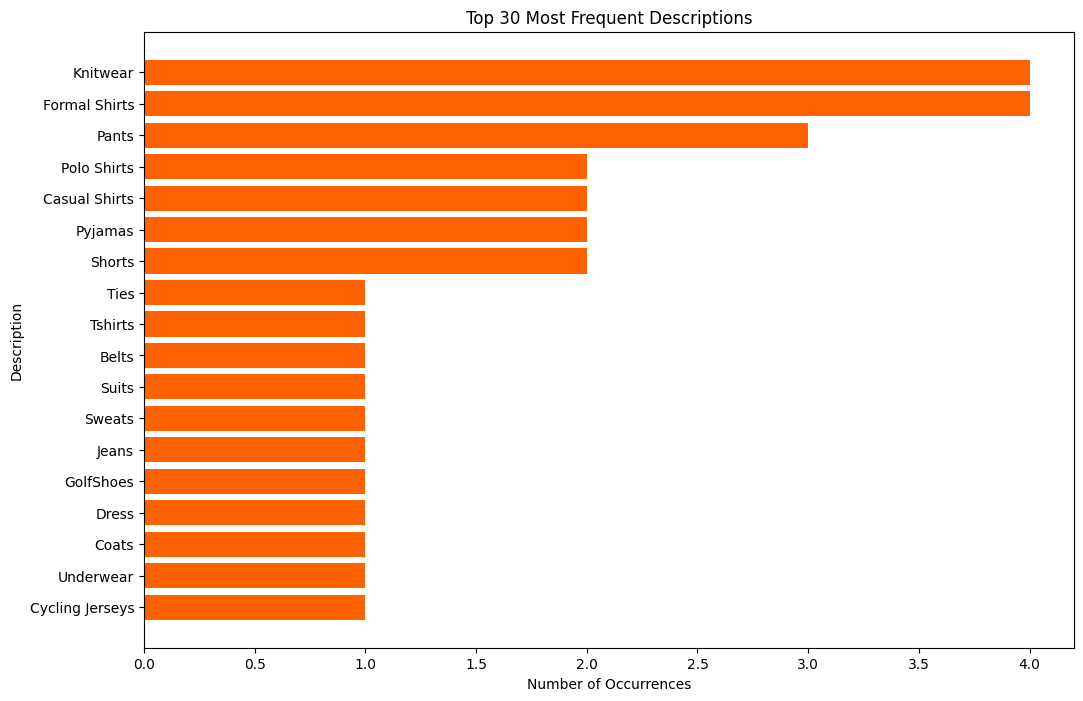

In [ ]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Product_Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

In [ ]:
def recommend_by_price_range(df, min_price, max_price):
    filtered_df = df[(df['Unit_Price'] >= min_price) & (df['Unit_Price'] <= max_price)]
    return filtered_df[['Product_Description', 'Unit_Price']]

In [ ]:
# Daftar bahan kain yang ingin difilter
Bahan = df['Raw_Material'].unique()

# Filter dataset berdasarkan bahan kain dan simpan hasilnya dalam dictionary
filtered_bahan = {}
for bahan in Bahan:
    filtered_bahan[bahan] = df[df['Raw_Material'] == bahan]

In [ ]:
filtered_bahan

{'Fabrics':        Date  Customer_ID  Product_ID  Quantity  Unit_Price  Sales_Revenue  \
 0  20210601           98         321         1  117.306016     117.306016   
 
   Product_Description Product_Category Product_Line Raw_Material Region  \
 0     Cycling Jerseys           Sports         Tops      Fabrics   York   
 
     Latitude  Longitude  Product_Category_Code  Cluster  
 0  53.958332  -1.080278                      2        0  ,
 'Cotton':         Date  Customer_ID  Product_ID  Quantity  Unit_Price  Sales_Revenue  \
 1   20210602           92         261         4   32.272403     129.089613   
 2   20210603           92         264         1   36.193364      36.193364   
 3   20210604           99         251         3   29.913403      89.740210   
 4   20210605           66         251         1   41.843430      41.843430   
 7   20210608           81         258         1   29.084205      29.084205   
 8   20210609           47         260         3   44.498077     133.49423

In [ ]:
# Daftar region yang unik dalam dataset
region_list = df['Region'].unique()

# Filter dataset berdasarkan region dan simpan hasilnya dalam dictionary
filtered_region = {}
for region in region_list:
    filtered_region[region] = df[df['Region'] == region]

In [ ]:
filtered_region

{'York':         Date  Customer_ID  Product_ID  Quantity  Unit_Price  Sales_Revenue  \
 0   20210601           98         321         1  117.306016     117.306016   
 12  20210613           55         260         1   34.742913      34.742913   
 18  20210619           98         280         3   41.412504     124.237513   
 27  20210628           56         262         1   33.470936      33.470936   
 
    Product_Description Product_Category Product_Line Raw_Material Region  \
 0      Cycling Jerseys           Sports         Tops      Fabrics   York   
 12       Formal Shirts         Menswear         Tops       Cotton   York   
 18               Pants       Womenswear     Trousers       Cotton   York   
 27       Formal Shirts         Menswear         Tops         Wool   York   
 
      Latitude  Longitude  Product_Category_Code  Cluster  
 0   53.958332  -1.080278                      2        0  
 12  53.958332  -1.080278                      1        1  
 18  53.958332  -1.080278   

In [71]:

class RecomenderSystem:
    def __init__(self, df_path):
        self.df = pd.read_csv(df_path)

    def recommend(self, prize=None, bahan=None, region_list=None):
        df = self.df.copy()
        Bahan = df['Raw_Material'].unique()
        region_list = df['Region'].unique()

        if prize is not None:
            df = self.RecommedPrize(df, prize=prize)

        if bahan is not None:
            df = self.RecomendedMaterial(df, bahan=bahan)

        if region_list is not None:
            df = self.RecomendedRegion(df, region_list=region_list)

        result = df[["Product_Description", "Unit_Price"]]
        result = result.sort_values("Unit_Price", ascending=False)

        return get_recommendations

    @staticmethod
    def RecommedPrize(df, prize):
        min_price, max_price = prize
        filtered_df = df[(df['Unit_Price'] >= min_price) & (df['Unit_Price'] <= max_price)]
        return filtered_df

    @staticmethod
    def RecomendedMaterial(df, bahan):
        filtered_bahan = df[df['Raw_Material'].isin(bahan)]
        return filtered_bahan

    @staticmethod
    def RecomendedRegion(df, region_list):
        filtered_region = df[df['Region'].isin(region_list)]
        return filtered_region

In [69]:
df_path = "/content/Sales_Product_Details (1).csv"
recsys = RecomenderSystem(df_path)

In [77]:
min_price = recsys.df['Unit_Price'].min()
result = recsys.recommend(prize=(min_price, None), bahan=["Fabrics", "Wool"], region_list=["Worcester", "Wells"])

In [78]:
result

,Product_Description,Unit_Price


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unit_Price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unit_Price'}, axis=1)
              .sort_values('Unit_Price', ascending=True))
  xs = counted['Unit_Price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Unit_Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unit_Price')
_ = plt.ylabel('count()')

In [ ]:

# Rekomendasi Berdasarkan Rentang Harga
def recommend_by_price_range(df, min_price, max_price):
    filtered_df = df[(df['Unit_Price'] >= min_price) & (df['Unit_Price'] <= max_price)]
    return filtered_df[['Product_Description', 'Unit_Price']]


# # Rekomendasi Berdasarkan Jenis Deskripsi Produk
# def recommend_by_description(df, description):
#     filtered_df = df[df['Product_Description'].str.contains(description, case=False, na=False)]
#     return filtered_df[['Product_Description', 'Product_Category', 'Unit_Price']]

# # Rekomendasi Berdasarkan Kategori Produk
# def recommend_by_category(df, category):
#     filtered_df = df[df['Product_Category'].str.contains(category, case=False, na=False)]
#     return filtered_df[['Product_Description', 'Product_Category', 'Unit_Price']]


In [ ]:
min_price = 50
max_price = 200
price_recommendations = recommend_by_price_range(df, min_price, max_price)
print("Rekomendasi berdasarkan rentang harga:")
print(price_recommendations)

Rekomendasi berdasarkan rentang harga:
   Product_Description  Unit_Price
0      Cycling Jerseys  117.306016
16              Sweats   51.968244
23           Underwear   54.994305
24             Pyjamas   50.795957
26               Pants   50.002619


In [ ]:
description = "Phone"
description_recommendations = recommend_by_description(df, description)
print("\nRekomendasi berdasarkan deskripsi produk:")
print(description_recommendations)



Rekomendasi berdasarkan deskripsi produk:
Empty DataFrame
Columns: [Product_Description, Product_Category, Unit_Price]
Index: []


In [ ]:
category = "Electronics"
category_recommendations = recommend_by_category(df, category)
print("\nRekomendasi berdasarkan kategori produk:")
print(category_recommendations)



Rekomendasi berdasarkan kategori produk:
Empty DataFrame
Columns: [Product_Description, Product_Category, Unit_Price]
Index: []


In [ ]:
Product_ID = df['Product_ID']
def get_recommendations(Product_ID, num_recommendations=10):
    product_cluster = df.loc[Product_ID, 'cluster']
    cluster_data = df[df['cluster'] == product_cluster]

    if cluster_data.shape[0] < num_recommendations + 1:
        return cluster_data

    cluster_data = cluster_data[cluster_data.index != Product_ID]  # Menghilangkan produk input
    recommendations = cluster_data.sample(num_recommendations)
    return recommendations
